<a href="https://colab.research.google.com/github/allanbraquiel/Notebooks/blob/master/Despesas_Hospitalares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/Projeto Despesas Hospitalares/despesas.csv")

In [3]:
df.head(10)

,idade,sexo,bmi,filhos,fumantes,regiao,gastos
0,19,mulher,27.9,0,sim,sudeste,16884.92
1,18,homem,33.8,1,nao,sul,1725.55
2,28,homem,33.0,3,nao,sul,4449.46
3,33,homem,22.7,0,nao,nordeste,21984.47
4,32,homem,28.9,0,nao,nordeste,3866.86
5,31,mulher,25.7,0,nao,sul,3756.62
6,46,mulher,33.4,1,nao,sul,8240.59
7,37,mulher,27.7,3,nao,nordeste,7281.51
8,37,homem,29.8,2,nao,norte,6406.41
9,60,mulher,25.8,0,nao,nordeste,28923.14


In [4]:
df.gastos.describe()

count     1338.000000
mean     13270.422414
std      12110.011240
min       1121.870000
25%       4740.287500
50%       9382.030000
75%      16639.915000
max      63770.430000
Name: gastos, dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     1338 non-null   int64  
 1   sexo      1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   filhos    1338 non-null   int64  
 4   fumantes  1338 non-null   object 
 5   regiao    1338 non-null   object 
 6   gastos    1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.sexo = df.sexo.astype("category")
df.fumantes = df.fumantes.astype("category")
df.regiao = df.regiao.astype("category")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   idade     1338 non-null   int64   
 1   sexo      1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   filhos    1338 non-null   int64   
 4   fumantes  1338 non-null   category
 5   regiao    1338 non-null   category
 6   gastos    1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1585846a20>,
      dtype=object)

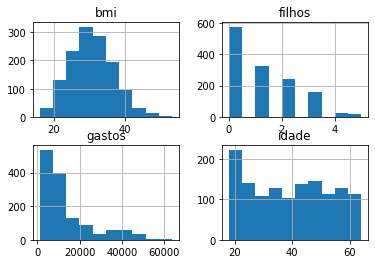

In [9]:
df.hist()

In [10]:
df.regiao.value_counts()

sul         364
sudeste     325
nordeste    325
norte       324
Name: regiao, dtype: int64

In [11]:
df.corr()

,idade,bmi,filhos,gastos
idade,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
filhos,0.042469,0.012645,1.000000,0.067998
gastos,0.299008,0.198576,0.067998,1.000000


In [12]:
df.isnull().sum()

idade       0
sexo        0
bmi         0
filhos      0
fumantes    0
regiao      0
gastos      0
dtype: int64

Text(0, 0.5, 'Gastos')

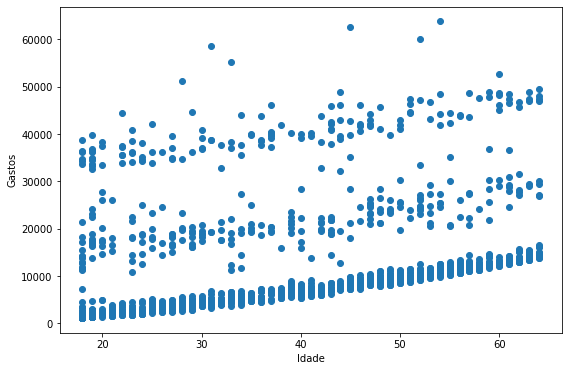

In [13]:
figure = plt.figure(figsize=(9,6))
plt.scatter(df['idade'], df['gastos'])
plt.xlabel('Idade')
plt.ylabel('Gastos')

Text(0, 0.5, 'gastos')

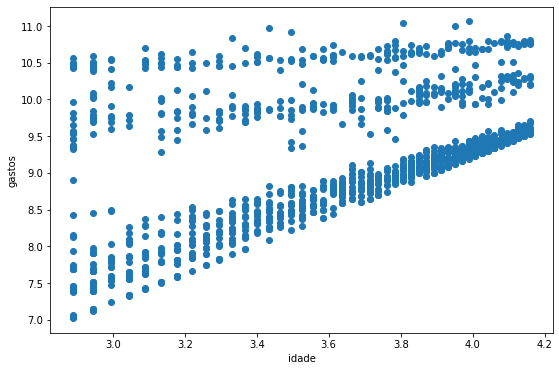

In [14]:
figure = plt.figure(figsize=(9,6))
plt.scatter(np.log(df['idade']), np.log(df['gastos']))
plt.xlabel('idade')
plt.ylabel('gastos')

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()

In [16]:
df.sexo = label_encoder1.fit_transform(df.sexo)
df.fumantes = label_encoder2.fit_transform(df.fumantes)
df.regiao = label_encoder3.fit_transform(df.regiao)

In [17]:
df.head()

,idade,sexo,bmi,filhos,fumantes,regiao,gastos
0,19,1,27.9,0,1,2,16884.92
1,18,0,33.8,1,0,3,1725.55
2,28,0,33.0,3,0,3,4449.46
3,33,0,22.7,0,0,0,21984.47
4,32,0,28.9,0,0,0,3866.86


In [18]:
x_data = df.drop(["gastos"], axis=1)
y_data = df["gastos"]

In [19]:
x_data.head()

,idade,sexo,bmi,filhos,fumantes,regiao
0,19,1,27.9,0,1,2
1,18,0,33.8,1,0,3
2,28,0,33.0,3,0,3
3,33,0,22.7,0,0,0
4,32,0,28.9,0,0,0


In [20]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [21]:
x.head()

,idade,sexo,bmi,filhos,fumantes,regiao
0,0.021739,1.0,0.320755,0.0,1.0,0.666667
1,0.000000,0.0,0.479784,0.2,0.0,1.000000
2,0.217391,0.0,0.458221,0.6,0.0,1.000000
3,0.326087,0.0,0.180593,0.0,0.0,0.000000
4,0.304348,0.0,0.347709,0.0,0.0,0.000000


In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_data, test_size=0.3, random_state=43)

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (936, 6)
x test:  (402, 6)
y train:  (936,)
y test:  (402,)


In [23]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()

modelo.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
modelo.coef_

array([10898.73018936,    34.35483682, 11966.53321558,  2560.51784869,
       23515.02985559, -1074.64005088])

In [25]:
modelo.score(x_test, y_test)

0.7503071601966779

In [26]:
slope = modelo.coef_
intercept = modelo.intercept_

In [27]:
print("b0: \t{}".format(intercept))
print("b1: \t{}".format(slope[0]))

b0: 	-1548.9062951057585
b1: 	10898.73018935864


In [28]:
y_pred = modelo.predict(x_test)

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [30]:
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

In [31]:
print ('Performance do modelo avaliado com os dados de teste:')
print('\nRMSE é: {} '.format(rmse))

Performance do modelo avaliado com os dados de teste:

RMSE é: 6410.298175048156 


In [34]:
# criar um dataframe vazio
resultado = pd.DataFrame()

In [35]:
resultado['valor_predito_reg_linear'] = modelo.predict(x_test)

In [36]:
resultado['valor_real'] = y_test.values

In [37]:
resultado.head()

,valor_predito_reg_linear,valor_real
0,8085.800114,18963.17
1,5959.482633,13725.47
2,2729.708259,2457.21
3,15062.067953,12979.36
4,27480.647012,18648.42


In [38]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=resultado.index,
                         y=resultado.valor_real,
                         mode='lines+markers',
                         name='Valor Real'))

# Linha com os dados preditos pela regressão linear
fig.add_trace(go.Scatter(x=resultado.index,
                         y=resultado.valor_predito_reg_linear,
                         mode='lines',
                         line = dict(color = '#FEBFB3'),
                         name='Valor Predito Regressão Linear'))

# Plota a figura
fig.show()

In [39]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

In [40]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [41]:
y_pred = regressor.predict(x_test)

In [42]:
resultado["valor_predito_arvore"] = y_pred

In [43]:
resultado.head()

,valor_predito_reg_linear,valor_real,valor_predito_arvore
0,8085.800114,18963.17,4151.03
1,5959.482633,13725.47,6117.49
2,2729.708259,2457.21,1906.36
3,15062.067953,12979.36,13470.86
4,27480.647012,18648.42,35147.53


In [44]:
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=resultado.index,
                         y=resultado.valor_real,
                         mode='lines+markers',
                         name='Valor Real'))

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=resultado.index,
                         y=resultado.valor_predito_reg_linear,
                         mode='lines+markers',
                         name='Valor Predito Reg Liner'))

# Linha com os dados preditos
fig.add_trace(go.Scatter(x=resultado.index,
                         y=resultado.valor_predito_arvore,
                         mode='lines+markers',
                         name='Valor Predito Arvore'))
# Plota a figura
fig.show()

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()

In [46]:
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [47]:
y_pred = rf_regressor.predict(x_test)

In [48]:
resultado["random_forest"] = y_pred

In [49]:
resultado.head()

,valor_predito_reg_linear,valor_real,valor_predito_arvore,random_forest
0,8085.800114,18963.17,4151.03,3824.6369
1,5959.482633,13725.47,6117.49,6876.2810
2,2729.708259,2457.21,1906.36,2532.1526
3,15062.067953,12979.36,13470.86,13947.0134
4,27480.647012,18648.42,35147.53,27102.2125


In [50]:
import plotly.graph_objects as go

# Create traces
fig = go.Figure()

# Linha com os dados de teste
fig.add_trace(go.Scatter(x=resultado.index,
                         y=resultado.valor_real,
                         mode='markers',
                         name='Valor Real'))

# Linha com os dados preditos pela arvore
fig.add_trace(go.Scatter(x=resultado.index,
                         y=resultado.valor_predito_arvore,
                         mode='lines',
                         line = dict(color = '#B2FF66'),
                         name='Valor Predito Árvore'))

# Linha com os dados preditos pela regressão linear
fig.add_trace(go.Scatter(x=resultado.index,
                         y=resultado.valor_predito_reg_linear,
                         mode='lines',
                         line = dict(color = '#17BECF'),
                         name='Valor Predito Regressão Linear'))


# Linha com os dados preditos pela Random Forest
fig.add_trace(go.Scatter(x=resultado.index,
                         y=resultado.random_forest,
                         mode='lines',
                         line = dict(color = '#7F7F7F'),
                         name='Valor Predito Random Forest'))

# Plota a figura
fig.show()

In [51]:
x.head()

,idade,sexo,bmi,filhos,fumantes,regiao
0,0.021739,1.0,0.320755,0.0,1.0,0.666667
1,0.000000,0.0,0.479784,0.2,0.0,1.000000
2,0.217391,0.0,0.458221,0.6,0.0,1.000000
3,0.326087,0.0,0.180593,0.0,0.0,0.000000
4,0.304348,0.0,0.347709,0.0,0.0,0.000000


In [52]:
x["gastos"] = y_data

In [53]:
x.head()

,idade,sexo,bmi,filhos,fumantes,regiao,gastos
0,0.021739,1.0,0.320755,0.0,1.0,0.666667,16884.92
1,0.000000,0.0,0.479784,0.2,0.0,1.000000,1725.55
2,0.217391,0.0,0.458221,0.6,0.0,1.000000,4449.46
3,0.326087,0.0,0.180593,0.0,0.0,0.000000,21984.47
4,0.304348,0.0,0.347709,0.0,0.0,0.000000,3866.86


In [54]:
x.to_csv("data.csv", index=False)

In [55]:
df.head()

,idade,sexo,bmi,filhos,fumantes,regiao,gastos
0,19,1,27.9,0,1,2,16884.92
1,18,0,33.8,1,0,3,1725.55
2,28,0,33.0,3,0,3,4449.46
3,33,0,22.7,0,0,0,21984.47
4,32,0,28.9,0,0,0,3866.86


In [56]:
df.to_csv("data2.csv", index=False)